## Observations and Insights 

* Observation One: Capomulin and Ramicane are the most effective drug regimens.

Both Capomulin and Ramicane have the lowest variances, lowest average final tumor volumes, and lowest standard deviations of all drug regiments as seen in the summary_stats_df. These drugs also have the highest measurements taken of all the drugs with no noted outliers. These measurements indicate that across all measurements this drug has proven most effective, with the most consistent results across all the mice tested with Ramicane and Capomulin 

* Observation Two: Of the the final tumor volume of each mouse across the four treatment regimens; Capomulin, Ramicane, Infubinol, and Ceftamin, Infubolin was the only one noted to have an outlier.

The appearance of a singular outlier amongst all four treatement regimens, regardless of the differences in other statistics or quartiles, these four treatment regimens produce consistent results that fall within the interquartile ranges of each respective drug. Indicating, while efficacy may vary between the drug regimens, they follow similar patterns of efficacy in a given treatment regimen. 

* Observation Three: The Capomulin drug regimen shows strong correlaton between average tumor size and the weight of the mouse. 

With a correlation coefficient between the average tumor volume and mouse weight of 0.84, showing that the heavier the weight of the mouse it is increasingly likely the tumor volume will also be heavier as well. This correlation coefficient is further supported by an upward trending linear regression. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on = "Mouse ID", how = "outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df.duplicated(["Mouse ID","Timepoint"]).value_counts()

False    1888
True        5
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df.duplicated(["Mouse ID","Timepoint"]),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(["Mouse ID","Timepoint"])

In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

249

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


# summary_df is the summary statistics table for the tumor volumne of each drug regimen
summary_df = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "Standard Deviation":stdev,
    "SEM":sem
})
summary_df


,Mean,Median,SEM,Standard Deviation,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.393463,50.909965,0.525862,6.568014,43.138803
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


## Bar and Pie Charts

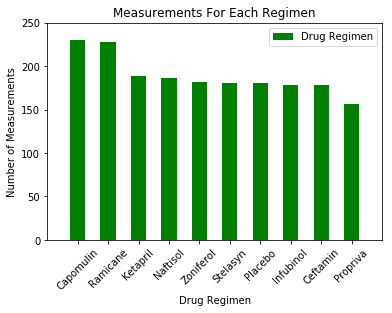

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regiment_df = pd.DataFrame(cleaned_df["Drug Regimen"].value_counts()).reset_index()
regiment_df.plot("index","Drug Regimen",kind="bar",rot=45,facecolor = "green")
plt.title("Measurements For Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-1, len(regiment_df["index"]))
plt.ylim(0, max(regiment_df["Drug Regimen"])+20)
plt.legend(loc="best")
plt.show()

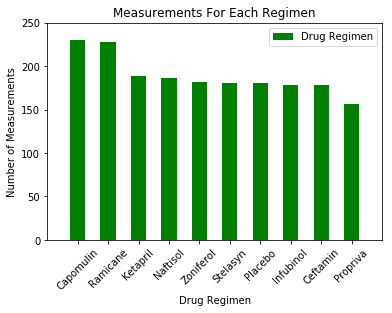

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
index = range(len(regiment_df["index"]))
plt.xticks(index, regiment_df["index"],rotation="45")
drug_regimen = regiment_df["Drug Regimen"]
plt.bar(index,drug_regimen,label = "Drug Regimen",facecolor = "green",width = 0.5)
plt.title("Measurements For Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-1, len(regiment_df["index"]))
plt.ylim(0, max(regiment_df["Drug Regimen"])+20)
plt.legend(loc="best")
plt.show()

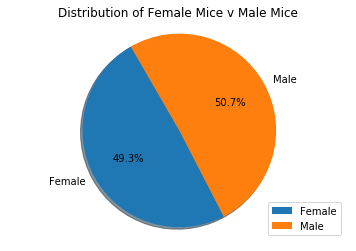

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution_df = cleaned_df.groupby("Sex").count()["Mouse ID"].rename("")
distribution_df.plot(kind="pie",shadow = True,autopct="%1.1f%%",startangle = 120)
plt.title("Distribution of Female Mice v Male Mice")
plt.axis("equal")
plt.legend(loc="lower right")
plt.show()

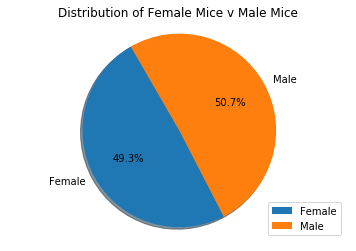

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution_df,labels = ["Female","Male"],shadow = True,autopct="%1.1f%%",startangle = 120)
plt.title("Distribution of Female Mice v Male Mice")
plt.axis("equal")
plt.legend(loc="lower right")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_filter_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | 
               (cleaned_df["Drug Regimen"] == "Ramicane")|
               (cleaned_df["Drug Regimen"] == "Infubinol")| 
               (cleaned_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
mouse_filter_df = drug_filter_df.groupby("Mouse ID").max()
mouse_filter_df = mouse_filter_df.loc[:,["Timepoint"]].reset_index()
mouse_filter_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_drug_filter_df = pd.merge(drug_filter_df,mouse_filter_df, how = "inner",on = ["Mouse ID","Timepoint"])
merged_drug_filter_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [15]:
capomulin = merged_drug_filter_df.loc[merged_drug_filter_df["Drug Regimen"] == "Capomulin",:]
ramicane = merged_drug_filter_df.loc[merged_drug_filter_df["Drug Regimen"] == "Ramicane",:]
infubinol = merged_drug_filter_df.loc[merged_drug_filter_df["Drug Regimen"] == "Infubinol",:]
ceftamin = merged_drug_filter_df.loc[merged_drug_filter_df["Drug Regimen"] == "Ceftamin",:]

In [18]:
capomulin_quartiles = capomulin.quantile([0.25,.5,.75])["Tumor Volume (mm3)"]
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(capomulin_lower_bound)
print(capomulin_upper_bound)
print(capomulin_iqr)
capomulin.loc[(capomulin["Tumor Volume (mm3)"] < capomulin_lower_bound) |(capomulin["Tumor Volume (mm3)"] > capomulin_upper_bound), :]

20.70456164999999
51.83201549
7.781863460000004


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [19]:
ramicane_quartiles = ramicane.quantile([0.25,.5,.75])["Tumor Volume (mm3)"]
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(ramicane_lower_bound)
print(ramicane_upper_bound)
print(ramicane_iqr)
ramicane.loc[(ramicane["Tumor Volume (mm3)"] < ramicane_lower_bound) |(ramicane["Tumor Volume (mm3)"] > ramicane_upper_bound), :]

17.912664470000003
54.30681135
9.098536719999998


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [20]:
infubinol_quartiles = infubinol.quantile([0.25,.5,.75])["Tumor Volume (mm3)"]
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(infubinol_lower_bound)
print(infubinol_upper_bound)
print(infubinol_iqr)
infubinol.loc[(infubinol["Tumor Volume (mm3)"] < infubinol_lower_bound) |(infubinol["Tumor Volume (mm3)"] > infubinol_upper_bound), :]

36.83290494999999
82.74144559000001
11.477135160000003


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
58,c326,Infubinol,Female,18,25,5,36.321346,0


In [21]:
ceftamin_quartiles = ceftamin.quantile([0.25,.5,.75])["Tumor Volume (mm3)"]
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(ceftamin_lower_bound)
print(ceftamin_upper_bound)
print(ceftamin_iqr)
ceftamin.loc[(ceftamin["Tumor Volume (mm3)"] < ceftamin_lower_bound) |(ceftamin["Tumor Volume (mm3)"] > ceftamin_upper_bound), :]

25.355449580000002
87.66645829999999
15.577752179999997


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


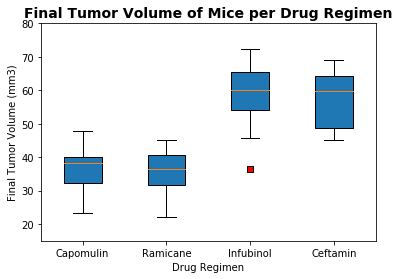

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin_tumor = capomulin["Tumor Volume (mm3)"]
ramicane_tumor = ramicane["Tumor Volume (mm3)"]
infubinol_tumor = infubinol["Tumor Volume (mm3)"]
ceftamin_tumor = ceftamin["Tumor Volume (mm3)"]

all_tumor_data = [capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(all_tumor_data, vert=True, patch_artist=True,labels = labels, flierprops=red_square) 
plt.title("Final Tumor Volume of Mice per Drug Regimen", fontsize=14, fontweight="bold")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xlim(0.5, len(all_tumor_data)+.5)
plt.ylim(15,80)
plt.show()

## Line and Scatter Plots

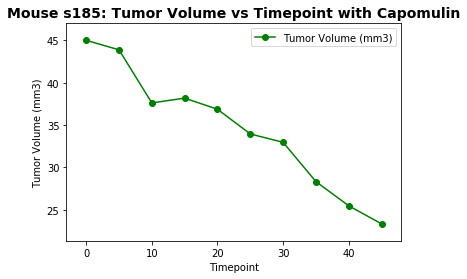

In [485]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "s185") ,:]
capomulin_mouse
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"],color="green",marker="o")
plt.title("Mouse s185: Tumor Volume vs Timepoint with Capomulin", fontsize=14, fontweight="bold")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-3, max(capomulin_mouse["Timepoint"])+3)
plt.ylim(min(capomulin_mouse["Tumor Volume (mm3)"]) - 2,max(capomulin_mouse["Tumor Volume (mm3)"])+2)
plt.legend(loc="best")
plt.show()

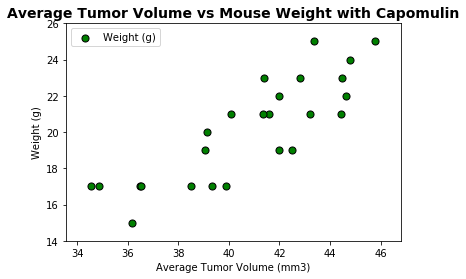

In [8]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") ,:]
capomulin_stats= capomulin_mice.groupby("Mouse ID").mean().loc[:, ["Weight (g)","Tumor Volume (mm3)"]]
plt.scatter(capomulin_stats["Tumor Volume (mm3)"],capomulin_stats["Weight (g)"],facecolor="green",edgecolor="black",s=50)
plt.title("Average Tumor Volume vs Mouse Weight with Capomulin", fontsize=14, fontweight="bold")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.xlim(min(capomulin_stats["Tumor Volume (mm3)"]) - 1,max(capomulin_stats["Tumor Volume (mm3)"])+1)
plt.ylim(min(capomulin_stats["Weight (g)"]) - 1,max(capomulin_stats["Weight (g)"])+1)
plt.legend(loc="best")
plt.show()

## Correlation and Regression

In [12]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_stats["Tumor Volume (mm3)"],capomulin_stats["Weight (g)"])[0]
correlation
print(f"The correlation coefficient between the average tumor volume and mouse weight for the Capomulin regimen is {round(correlation,2)}.")

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_stats["Tumor Volume (mm3)"],capomulin_stats["Weight (g)"])
regress_values = capomulin_stats["Tumor Volume (mm3)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The correlation coefficient between the average tumor volume and mouse weight for the Capomulin regimen is 0.84.


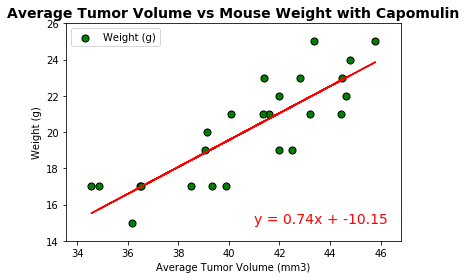

In [11]:
plt.scatter(capomulin_stats["Tumor Volume (mm3)"],capomulin_stats["Weight (g)"],facecolor="green",edgecolor="black",s=50)
plt.title("Average Tumor Volume vs Mouse Weight with Capomulin", fontsize=14, fontweight="bold")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.xlim(min(capomulin_stats["Tumor Volume (mm3)"]) - 1,max(capomulin_stats["Tumor Volume (mm3)"])+1)
plt.ylim(min(capomulin_stats["Weight (g)"]) - 1,max(capomulin_stats["Weight (g)"])+1)
plt.legend(loc="best")
plt.plot(capomulin_stats["Tumor Volume (mm3)"],regress_values,"r-")
plt.annotate(line_eq,(41,15),fontsize=14,color="red")
plt.show()
